# Function Approximation

In [311]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

## Import linear data

In [312]:
dataset = pd.read_csv('1in_linear.txt', sep=" ", header=None, delimiter="\t")
x = dataset.iloc[:, 0 ].values
y = dataset.iloc[:, 1 ].values
y_actual = asarray([i for i in x])
label = 'Linear'
dimension = 1

## Import cubic data

In [313]:
dataset = pd.read_csv('1in_cubic.txt', sep="\s+", header=None, delimiter="\s+")
x = dataset.iloc[:, 0 ].values
y = dataset.iloc[:, 1 ].values
y_actual = asarray([pow(i,3) for i in x])
label = 'Cubic'
dimension = 1

## Import sine data

In [314]:
dataset = pd.read_csv('1in_sine.txt', sep="\s+", header=None, delimiter="\s+")
x = dataset.iloc[:, 0 ].values
y = dataset.iloc[:, 1 ].values
y_actual = asarray([np.sin(i) for i in x])
label = 'Sine'
dimension = 1

## Import tanh data

In [315]:
dataset = pd.read_csv('1in_tanh.txt', sep="\s+", header=None, delimiter="\s+")
x = dataset.iloc[:, 0 ].values
y = dataset.iloc[:, 1 ].values
y_actual = asarray([np.tanh(i) for i in x])
label = 'Tanh'
dimension = 1

## Import xor data

In [316]:
dataset = pd.read_csv('2in_xor.txt', sep="\s+", header=None, delimiter="\s+")
x = dataset.iloc[:, 0:2 ].values
x1 = dataset.iloc[:, 0 ].values
x2 = dataset.iloc[:, 1 ].values
y = dataset.iloc[:, 2 ].values
x1 = np.array(x1, dtype=bool)
x2 = np.array(x2, dtype=bool)
y_actual = np.array(x1^x2, dtype=int)
label = 'XOR'
dimension = 2

## Initilise ANN

In [317]:
ann = Sequential()
ann.add(Dense(10, input_dim=dimension, activation='relu', kernel_initializer='he_uniform'))
ann.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
ann.add(Dense(1))

## Compile and run ANN

In [318]:
ann.compile(loss='mse', optimizer='adam')

In [319]:
ann.fit(x, y, epochs=500, batch_size=10, verbose=0)

In [320]:
yhat = ann.predict(x)

## Print Mean Squared Error and plot comparison

In [321]:
print('MSE: %.3f' %mean_squared_error(y_actual, yhat))

MSE: 0.167


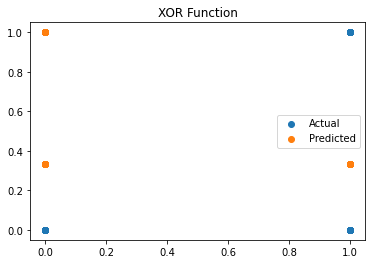

In [322]:
plt.scatter(x,y_actual, label = 'Actual')
plt.scatter(x, yhat, label = 'Predicted')
plt.title(label + ' Function')
plt.legend()
plt.show()